In [62]:


import numpy as np
import pandas as pd 


In [63]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import math





In [64]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("submission.csv")
submission=test[['id']]
train

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.8250,0.6500,0.2375,5.669900,2.721552,1.587572,1.984465,6.0
1,1,M,1.4250,1.1125,0.3750,24.139599,12.870673,5.003687,7.087375,9.0
2,2,F,1.3000,0.9875,0.3375,15.436303,6.973977,2.934173,6.236890,11.0
3,3,F,1.1000,0.8625,0.3125,12.785625,4.861939,2.593979,3.685435,14.0
4,4,F,1.6125,1.2750,0.4000,33.877653,15.989118,7.271647,9.681354,9.0
...,...,...,...,...,...,...,...,...,...,...
14995,14995,I,0.9000,0.7000,0.2250,5.060386,2.707377,1.048931,1.757669,7.0
14996,14996,I,0.9625,0.7750,0.2375,7.980384,3.260193,1.559222,2.409708,7.0
14997,14997,I,0.8375,0.6250,0.2250,5.712424,2.749901,1.048931,1.261553,7.0
14998,14998,I,1.0125,0.7750,0.2250,9.071840,3.572037,2.140387,3.118445,7.0


<Axes: >

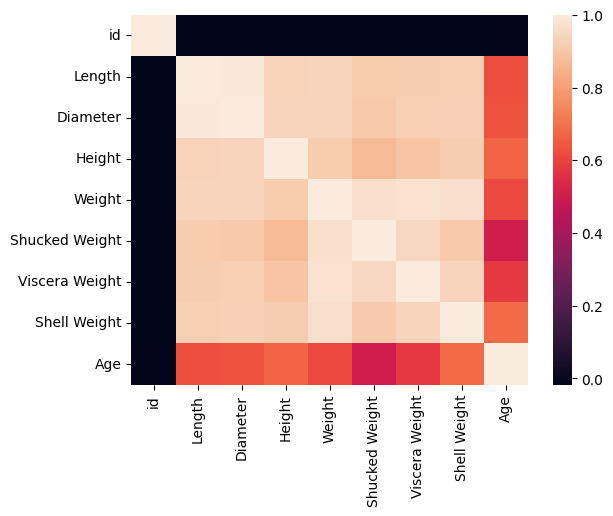

In [65]:
corr=train.corr(numeric_only=True)
sns.heatmap(corr)

In [66]:
corr


,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,-0.015490,-0.016114,-0.016634,-0.015989,-0.014063,-0.015896,-0.012732,-0.010802
Length,-0.015490,1.000000,0.991895,0.934717,0.938175,0.913271,0.919957,0.922486,0.624483
Diameter,-0.016114,0.991895,1.000000,0.937645,0.940267,0.912115,0.921100,0.928029,0.632747
Height,-0.016634,0.934717,0.937645,1.000000,0.913788,0.871058,0.895329,0.919594,0.666931
Weight,-0.015989,0.938175,0.940267,0.913788,1.000000,0.969913,0.973612,0.968024,0.613925
Shucked Weight,-0.014063,0.913271,0.912115,0.871058,0.969913,1.000000,0.945864,0.910198,0.504102
Viscera Weight,-0.015896,0.919957,0.921100,0.895329,0.973612,0.945864,1.000000,0.938605,0.581712
Shell Weight,-0.012732,0.922486,0.928029,0.919594,0.968024,0.910198,0.938605,1.000000,0.683196
Age,-0.010802,0.624483,0.632747,0.666931,0.613925,0.504102,0.581712,0.683196,1.000000


In [67]:
from sklearn.preprocessing import LabelEncoder


ln = LabelEncoder()
train['Sex'] = ln.fit_transform(train['Sex'])
train
test['Sex'] = ln.fit_transform(test['Sex'])


In [68]:

age=train.pop('id')





In [69]:
train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,0.8250,0.6500,0.2375,5.669900,2.721552,1.587572,1.984465,6.0
1,2,1.4250,1.1125,0.3750,24.139599,12.870673,5.003687,7.087375,9.0
2,0,1.3000,0.9875,0.3375,15.436303,6.973977,2.934173,6.236890,11.0
3,0,1.1000,0.8625,0.3125,12.785625,4.861939,2.593979,3.685435,14.0
4,0,1.6125,1.2750,0.4000,33.877653,15.989118,7.271647,9.681354,9.0
...,...,...,...,...,...,...,...,...,...
14995,1,0.9000,0.7000,0.2250,5.060386,2.707377,1.048931,1.757669,7.0
14996,1,0.9625,0.7750,0.2375,7.980384,3.260193,1.559222,2.409708,7.0
14997,1,0.8375,0.6250,0.2250,5.712424,2.749901,1.048931,1.261553,7.0
14998,1,1.0125,0.7750,0.2250,9.071840,3.572037,2.140387,3.118445,7.0


In [70]:
#Feature Engineering

from math import sqrt
def feng(df):

   df['Viscera Ratio'] = df['Viscera Weight'] / df['Weight']
   df['Shell Ratio'] = df['Shell Weight'] / df['Weight']
   df['Shell-to-Body Ratio'] = df['Shell Weight'] / (df['Weight'] + df['Shell Weight'])
   df['Length-to-Diameter Ratio'] = df['Length'] / df['Diameter']
   df['Weight-to-VisceraWeight Ratio'] = df['Weight'] / df['Viscera Weight']
   df['Weight-to-ShellWeight Ratio'] = df['Weight'] / df['Shell Weight']
   df['Weight-to-ShuckedWeight Ratio'] = df['Weight'] / df['Shucked Weight']
    
   df['Volume'] = df['Length'] * df['Diameter'] * df['Height']
   df['Density'] = df['Weight'] / df['Volume']
   df['Pseudo BMI'] = df['Weight'] / (df['Height']**2)


feng(train)
train
train['Density'].replace([np.inf, -np.inf], np.nan, inplace=True)
train['Pseudo BMI'].replace([np.inf, -np.inf], np.nan, inplace=True)

train['Density'].fillna(train['Density'].mean(), inplace=True)
train['Pseudo BMI'].fillna(train['Pseudo BMI'].mean(), inplace=True)
infinite_mask = train.applymap(np.isinf)




C:\Users\sanin\AppData\Local\Temp\ipykernel_18132\3507126291.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Density'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\sanin\AppData\Local\Temp\ipykernel_18132\3507126291.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [71]:
U=train.drop(columns=['Age'])
Y=train['Age']
Y = Y.to_frame(name='Age')

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(U,Y,test_size=0.3,random_state=51)
U



,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Viscera Ratio,Shell Ratio,Shell-to-Body Ratio,Length-to-Diameter Ratio,Weight-to-VisceraWeight Ratio,Weight-to-ShellWeight Ratio,Weight-to-ShuckedWeight Ratio,Volume,Density,Pseudo BMI
0,1,0.8250,0.6500,0.2375,5.669900,2.721552,1.587572,1.984465,0.280000,0.350000,0.259259,1.269231,3.571429,2.857143,2.083333,0.127359,44.518906,100.519003
1,2,1.4250,1.1125,0.3750,24.139599,12.870673,5.003687,7.087375,0.207281,0.293600,0.226963,1.280899,4.824363,3.406000,1.875551,0.594492,40.605410,171.659372
2,0,1.3000,0.9875,0.3375,15.436303,6.973977,2.934173,6.236890,0.190083,0.404040,0.287770,1.316456,5.260870,2.475000,2.213415,0.433266,35.627804,135.517610
3,0,1.1000,0.8625,0.3125,12.785625,4.861939,2.593979,3.685435,0.202882,0.288248,0.223752,1.275362,4.928962,3.469231,2.629738,0.296484,43.124109,130.924795
4,0,1.6125,1.2750,0.4000,33.877653,15.989118,7.271647,9.681354,0.214644,0.285774,0.222258,1.264706,4.658869,3.499268,2.118794,0.822375,41.194896,211.735328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,0.9000,0.7000,0.2250,5.060386,2.707377,1.048931,1.757669,0.207283,0.347339,0.257796,1.285714,4.824324,2.879032,1.869110,0.141750,35.699370,99.958237
14996,1,0.9625,0.7750,0.2375,7.980384,3.260193,1.559222,2.409708,0.195382,0.301954,0.231924,1.241935,5.118182,3.311765,2.447826,0.177160,45.046157,141.480496
14997,1,0.8375,0.6250,0.2250,5.712424,2.749901,1.048931,1.261553,0.183623,0.220844,0.180894,1.340000,5.445946,4.528090,2.077320,0.117773,48.503503,112.838010
14998,1,1.0125,0.7750,0.2250,9.071840,3.572037,2.140387,3.118445,0.235937,0.343750,0.255814,1.306452,4.238411,2.909091,2.539683,0.176555,51.382606,179.196840


In [131]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
import xgboost as xgb

sampler = TPESampler()
pruner = MedianPruner()

def objective(trial):
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 500, 1500),  # Increase the lower limit
    'max_depth': trial.suggest_int('max_depth', 4, 12),  # Narrow the range
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),  # Narrow the range
    'subsample': trial.suggest_float('subsample', 0.6, 0.9),  # Narrow the range
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),  # Narrow the range
    'min_child_weight': trial.suggest_int('min_child_weight', 1, 8),  # Narrow the range
    'gamma': trial.suggest_float('gamma', 0, 2),  # Narrow the range
    'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.5),  # Narrow the range
    'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.5),  # Narrow the range
    'random_state': 43,
    'use_label_encoder': False,
    'objective': 'reg:squarederror'
    }
    

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', xgb.XGBRegressor(**params))
    ])
    
    score = cross_val_score(pipeline, U, Y.values.ravel(), cv=10, scoring='neg_mean_absolute_error').mean()
    return score

study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
study.optimize(objective, n_trials=100, n_jobs=-1)

print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

[I 2024-09-09 20:46:37,201] A new study created in memory with name: no-name-dde9db19-8fea-4106-ba7e-c4a5d3831040
[I 2024-09-09 20:48:23,386] Trial 4 finished with value: -1.4302323946008157 and parameters: {'n_estimators': 984, 'max_depth': 11, 'learning_rate': 0.11658039403271324, 'subsample': 0.8324100951010258, 'colsample_bytree': 0.7338694739598517, 'min_child_weight': 4, 'gamma': 1.6735805351639463, 'reg_alpha': 0.4040162578135416, 'reg_lambda': 0.31718916536013486}. Best is trial 4 with value: -1.4302323946008157.
[I 2024-09-09 20:48:44,103] Trial 2 finished with value: -1.4740805844737446 and parameters: {'n_estimators': 1024, 'max_depth': 11, 'learning_rate': 0.1537326295255086, 'subsample': 0.6940923001910901, 'colsample_bytree': 0.7986771978390472, 'min_child_weight': 3, 'gamma': 1.202674575275576, 'reg_alpha': 0.18631772713038425, 'reg_lambda': 0.09677885154447752}. Best is trial 4 with value: -1.4302323946008157.
[I 2024-09-09 20:49:01,456] Trial 7 finished with value: -1.

Best hyperparameters:  {'n_estimators': 548, 'max_depth': 4, 'learning_rate': 0.011080460345868334, 'subsample': 0.759005270383999, 'colsample_bytree': 0.6835021390953522, 'min_child_weight': 8, 'gamma': 0.9986523929091728, 'reg_alpha': 0.31833696235601916, 'reg_lambda': 0.4178795855314424}
Best score:  -1.3540318477564448


In [ ]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),  # Increase the lower limit
        'depth': trial.suggest_int('depth', 4, 10),  # Narrow the range
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),  # Narrow the range
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),  # Narrow the range
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'random_state': 43,
        'verbose': 0  # No output during training
    }
    
    model = CatBoostRegressor(**params)
    
    score = cross_val_score(model, U, Y.values.ravel(), cv=10, scoring='neg_mean_absolute_error').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

[I 2024-09-09 21:15:41,025] A new study created in memory with name: no-name-747fd0ed-d908-4550-ab05-6925c069e3c4
C:\Users\sanin\AppData\Local\Temp\ipykernel_16868\801155533.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
[I 2024-09-09 21:16:34,363] Trial 4 finished with value: -1.3890301666381748 and parameters: {'iterations': 744, 'depth': 4, 'learning_rate': 0.1450313901783297, 'l2_leaf_reg': 0.07476108907028725, 'subsample': 0.7230253582038548, 'random_strength': 9.941610896242635, 'bagging_temperature': 0.538197850147884, 'border_count': 26}. Best is trial 4 with value: -1.3890301666381748.
C:\Users\sanin\AppData\Local\Temp\ipykernel_16868\801155533.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in

In [73]:

import xgboost as xgb
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

model1 = XGBRegressor(n_estimators= 548, max_depth= 4, learning_rate= 0.011080460345868334, subsample= 0.759005270383999, colsample_bytree=0.6835021390953522, min_child_weight= 8, gamma= 0.9986523929091728, reg_alpha= 0.31833696235601916,reg_lambda= 0.4178795855314424)
model1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6835021390953522, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.9986523929091728,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.011080460345868334,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=548, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
print(model1.score(x_test,y_test))
mae = mean_absolute_error(y_test,model1.predict(x_test))
print("Mean Absolute Error (MAE):", mae)

0.6177210211753845
Mean Absolute Error (MAE): 1.3518823216756184


In [75]:
from catboost import CatBoostRegressor

model2=CatBoostRegressor(iterations= 977, depth= 9,learning_rate= 0.01256788035441517, l2_leaf_reg= 0.007890455697337396, subsample= 0.6758693734243942, random_strength= 6.6013847264596, bagging_temperature= 0.983413525621641, border_count= 246)
model2.fit(x_train,y_train)


0:	learn: 3.1890140	total: 15.2ms	remaining: 14.9s
1:	learn: 3.1682136	total: 29.4ms	remaining: 14.3s
2:	learn: 3.1467636	total: 43ms	remaining: 14s
3:	learn: 3.1259730	total: 55.4ms	remaining: 13.5s
4:	learn: 3.1050458	total: 67ms	remaining: 13s
5:	learn: 3.0843904	total: 78.8ms	remaining: 12.8s
6:	learn: 3.0650633	total: 90.9ms	remaining: 12.6s
7:	learn: 3.0457592	total: 102ms	remaining: 12.4s
8:	learn: 3.0279148	total: 115ms	remaining: 12.3s
9:	learn: 3.0082471	total: 127ms	remaining: 12.3s
10:	learn: 2.9893122	total: 140ms	remaining: 12.3s
11:	learn: 2.9739211	total: 152ms	remaining: 12.2s
12:	learn: 2.9591078	total: 164ms	remaining: 12.1s
13:	learn: 2.9411639	total: 177ms	remaining: 12.2s
14:	learn: 2.9232906	total: 189ms	remaining: 12.1s
15:	learn: 2.9061950	total: 201ms	remaining: 12.1s
16:	learn: 2.8889171	total: 214ms	remaining: 12.1s
17:	learn: 2.8726014	total: 227ms	remaining: 12.1s
18:	learn: 2.8556793	total: 240ms	remaining: 12.1s
19:	learn: 2.8409774	total: 252ms	remainin

In [76]:
print(model2.score(x_test,y_test))
mae = mean_absolute_error(y_test,model2.predict(x_test))
print("Mean Absolute Error (MAE):", mae)

0.6130843757313403
Mean Absolute Error (MAE): 1.358651315683727


In [78]:
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
ensemble_models = [
    ('xgb',model1),
    ('cb', model2),
]
voter = VotingRegressor(ensemble_models)
pipeline = make_pipeline(StandardScaler(), voter)
scores = cross_val_score(pipeline, U,Y, cv=5, scoring='neg_mean_absolute_error')

print("Cross-validation MAE scores:", -scores)
print(-scores.mean())


C:\Users\sanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:	learn: 3.1958740	total: 13.8ms	remaining: 13.5s
1:	learn: 3.1758182	total: 25.3ms	remaining: 12.3s
2:	learn: 3.1556209	total: 37.5ms	remaining: 12.2s
3:	learn: 3.1361218	total: 49.9ms	remaining: 12.1s
4:	learn: 3.1154116	total: 62.2ms	remaining: 12.1s
5:	learn: 3.0949309	total: 74.2ms	remaining: 12s
6:	learn: 3.0755169	total: 86.4ms	remaining: 12s
7:	learn: 3.0563443	total: 98.4ms	remaining: 11.9s
8:	learn: 3.0372080	total: 110ms	remaining: 11.8s
9:	learn: 3.0177838	total: 122ms	remaining: 11.8s
10:	learn: 2.9989789	total: 134ms	remaining: 11.8s
11:	learn: 2.9847195	total: 147ms	remaining: 11.8s
12:	learn: 2.9699718	total: 159ms	remaining: 11.8s
13:	learn: 2.9522157	total: 171ms	remaining: 11.8s
14:	learn: 2.9358979	total: 183ms	remaining: 11.7s
15:	learn: 2.9190153	total: 195ms	remaining: 11.7s
16:	learn: 2.9011744	total: 208ms	remaining: 11.7s
17:	learn: 2.8862392	total: 222ms	remaining: 11.8s
18:	learn: 2.8698800	total: 235ms	remaining: 11.8s
19:	learn: 2.8537106	total: 247ms	rem

C:\Users\sanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:	learn: 3.1914602	total: 15.5ms	remaining: 15.1s
1:	learn: 3.1712276	total: 28.6ms	remaining: 14s
2:	learn: 3.1510620	total: 42ms	remaining: 13.6s
3:	learn: 3.1301935	total: 55.4ms	remaining: 13.5s
4:	learn: 3.1091472	total: 67.9ms	remaining: 13.2s
5:	learn: 3.0889310	total: 79.5ms	remaining: 12.9s
6:	learn: 3.0697804	total: 91.8ms	remaining: 12.7s
7:	learn: 3.0504026	total: 104ms	remaining: 12.6s
8:	learn: 3.0324766	total: 116ms	remaining: 12.5s
9:	learn: 3.0128863	total: 129ms	remaining: 12.5s
10:	learn: 2.9938710	total: 142ms	remaining: 12.5s
11:	learn: 2.9798778	total: 155ms	remaining: 12.5s
12:	learn: 2.9646414	total: 167ms	remaining: 12.4s
13:	learn: 2.9466997	total: 180ms	remaining: 12.4s
14:	learn: 2.9288187	total: 193ms	remaining: 12.4s
15:	learn: 2.9117013	total: 205ms	remaining: 12.3s
16:	learn: 2.8943779	total: 218ms	remaining: 12.3s
17:	learn: 2.8782639	total: 232ms	remaining: 12.3s
18:	learn: 2.8623715	total: 244ms	remaining: 12.3s
19:	learn: 2.8460197	total: 256ms	rema

C:\Users\sanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:	learn: 3.1620125	total: 14.5ms	remaining: 14.1s
1:	learn: 3.1415040	total: 26.5ms	remaining: 12.9s
2:	learn: 3.1214777	total: 38.8ms	remaining: 12.6s
3:	learn: 3.1009653	total: 51ms	remaining: 12.4s
4:	learn: 3.0799103	total: 63.4ms	remaining: 12.3s
5:	learn: 3.0599180	total: 75.7ms	remaining: 12.3s
6:	learn: 3.0408735	total: 88.1ms	remaining: 12.2s
7:	learn: 3.0215056	total: 100ms	remaining: 12.2s
8:	learn: 3.0024342	total: 112ms	remaining: 12.1s
9:	learn: 2.9831248	total: 125ms	remaining: 12.1s
10:	learn: 2.9644531	total: 138ms	remaining: 12.1s
11:	learn: 2.9495160	total: 150ms	remaining: 12.1s
12:	learn: 2.9322183	total: 162ms	remaining: 12s
13:	learn: 2.9146362	total: 175ms	remaining: 12s
14:	learn: 2.8968869	total: 187ms	remaining: 12s
15:	learn: 2.8802635	total: 199ms	remaining: 12s
16:	learn: 2.8632716	total: 212ms	remaining: 12s
17:	learn: 2.8474700	total: 225ms	remaining: 12s
18:	learn: 2.8318033	total: 237ms	remaining: 11.9s
19:	learn: 2.8157169	total: 249ms	remaining: 11.

C:\Users\sanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:	learn: 3.1875532	total: 13.2ms	remaining: 12.9s
1:	learn: 3.1674876	total: 25.4ms	remaining: 12.4s
2:	learn: 3.1473815	total: 37.3ms	remaining: 12.1s
3:	learn: 3.1279196	total: 50ms	remaining: 12.2s
4:	learn: 3.1070980	total: 62.4ms	remaining: 12.1s
5:	learn: 3.0869640	total: 74.3ms	remaining: 12s
6:	learn: 3.0678527	total: 86.7ms	remaining: 12s
7:	learn: 3.0487385	total: 98.6ms	remaining: 11.9s
8:	learn: 3.0307319	total: 111ms	remaining: 11.9s
9:	learn: 3.0114339	total: 123ms	remaining: 11.9s
10:	learn: 2.9927434	total: 136ms	remaining: 11.9s
11:	learn: 2.9785276	total: 149ms	remaining: 11.9s
12:	learn: 2.9621719	total: 161ms	remaining: 11.9s
13:	learn: 2.9445181	total: 174ms	remaining: 11.9s
14:	learn: 2.9268715	total: 186ms	remaining: 11.9s
15:	learn: 2.9100664	total: 199ms	remaining: 11.9s
16:	learn: 2.8930358	total: 211ms	remaining: 11.9s
17:	learn: 2.8770630	total: 225ms	remaining: 12s
18:	learn: 2.8613647	total: 237ms	remaining: 12s
19:	learn: 2.8451856	total: 249ms	remaining

C:\Users\sanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:	learn: 3.2081622	total: 15.4ms	remaining: 15s
1:	learn: 3.1876478	total: 27.4ms	remaining: 13.3s
2:	learn: 3.1663378	total: 40.5ms	remaining: 13.2s
3:	learn: 3.1455693	total: 53.5ms	remaining: 13s
4:	learn: 3.1244879	total: 66ms	remaining: 12.8s
5:	learn: 3.1046073	total: 78.2ms	remaining: 12.6s
6:	learn: 3.0853794	total: 91.2ms	remaining: 12.6s
7:	learn: 3.0660666	total: 103ms	remaining: 12.5s
8:	learn: 3.0483346	total: 116ms	remaining: 12.4s
9:	learn: 3.0288066	total: 130ms	remaining: 12.6s
10:	learn: 3.0097688	total: 144ms	remaining: 12.7s
11:	learn: 2.9945975	total: 157ms	remaining: 12.6s
12:	learn: 2.9774462	total: 169ms	remaining: 12.5s
13:	learn: 2.9594017	total: 181ms	remaining: 12.5s
14:	learn: 2.9413124	total: 193ms	remaining: 12.4s
15:	learn: 2.9244783	total: 206ms	remaining: 12.4s
16:	learn: 2.9071466	total: 219ms	remaining: 12.4s
17:	learn: 2.8920723	total: 232ms	remaining: 12.3s
18:	learn: 2.8753543	total: 243ms	remaining: 12.3s
19:	learn: 2.8586693	total: 257ms	remain

In [79]:
pipeline.fit(x_train,y_train)

C:\Users\sanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:	learn: 3.1890140	total: 14.4ms	remaining: 14.1s
1:	learn: 3.1682136	total: 26.2ms	remaining: 12.8s
2:	learn: 3.1467636	total: 38.9ms	remaining: 12.6s
3:	learn: 3.1259730	total: 51.1ms	remaining: 12.4s
4:	learn: 3.1050458	total: 62.9ms	remaining: 12.2s
5:	learn: 3.0843904	total: 74.5ms	remaining: 12.1s
6:	learn: 3.0650633	total: 86.6ms	remaining: 12s
7:	learn: 3.0457592	total: 98.2ms	remaining: 11.9s
8:	learn: 3.0279148	total: 110ms	remaining: 11.8s
9:	learn: 3.0082471	total: 122ms	remaining: 11.8s
10:	learn: 2.9893122	total: 135ms	remaining: 11.8s
11:	learn: 2.9739211	total: 147ms	remaining: 11.8s
12:	learn: 2.9591078	total: 158ms	remaining: 11.7s
13:	learn: 2.9411639	total: 171ms	remaining: 11.8s
14:	learn: 2.9232906	total: 183ms	remaining: 11.8s
15:	learn: 2.9061950	total: 196ms	remaining: 11.8s
16:	learn: 2.8889171	total: 209ms	remaining: 11.8s
17:	learn: 2.8726014	total: 222ms	remaining: 11.8s
18:	learn: 2.8556793	total: 235ms	remaining: 11.8s
19:	learn: 2.8409774	total: 247ms	r

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingregressor',
                 VotingRegressor(estimators=[('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=0.6835021390953522,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=...
                                                           learning_rate=0.011080460345868334,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=4,
                                                           max_leaves=None,
                                                           min_child_weight=8,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=548,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...)),
                                             ('cb',
                                              <catboost.core.CatBoostRegressor object at 0x000001EA60652FF0>)]))])

In [80]:
print(pipeline.score(x_test,y_test))
mae = mean_absolute_error(y_test,pipeline.predict(x_test))
print("Mean Absolute Error (MAE):", mae)

0.6171680660717779
Mean Absolute Error (MAE): 1.3520722783805144


In [90]:
test=pd.read_csv('test.csv')
test['Sex'] = ln.fit_transform(test['Sex'])
feng(test)
test['Density'].replace([np.inf, -np.inf], np.nan, inplace=True)
test['Pseudo BMI'].replace([np.inf, -np.inf], np.nan, inplace=True)

test['Density'].fillna(test['Density'].mean(), inplace=True)
test['Pseudo BMI'].fillna(test['Pseudo BMI'].mean(), inplace=True)
test = test[~test.applymap(np.isinf).any(axis=1)]
test


C:\Users\sanin\AppData\Local\Temp\ipykernel_18132\4252960850.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Density'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\sanin\AppData\Local\Temp\ipykernel_18132\4252960850.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Viscera Ratio,Shell Ratio,Shell-to-Body Ratio,Length-to-Diameter Ratio,Weight-to-VisceraWeight Ratio,Weight-to-ShellWeight Ratio,Weight-to-ShuckedWeight Ratio,Volume,Density,Pseudo BMI
0,15000,2,1.3250,1.0125,0.3875,20.950281,7.555142,4.535920,7.172423,0.216509,0.342355,0.255040,1.308642,4.618750,2.920949,2.772983,0.519855,40.300202,139.523200
1,15001,1,1.2125,0.9125,0.2625,14.755915,6.123492,3.486988,4.819415,0.236311,0.326609,0.246198,1.328767,4.231707,3.061765,2.409722,0.290432,50.806843,214.144795
2,15002,0,1.3625,1.0125,0.3125,18.809893,8.419802,4.195726,5.953395,0.223060,0.316503,0.240412,1.345679,4.483108,3.159524,2.234007,0.431104,43.631964,192.613307
3,15003,2,1.2500,0.9750,0.3000,15.776497,6.279414,3.756309,4.535920,0.238095,0.287511,0.223308,1.282051,4.200000,3.478125,2.512415,0.365625,43.149393,175.294408
4,15004,2,1.5625,1.2500,0.4375,36.514156,13.990478,8.930093,9.879801,0.244565,0.270575,0.212954,1.250000,4.088889,3.695839,2.609929,0.854492,42.731995,190.767835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,0,1.6375,1.3250,0.4750,41.347746,17.931059,9.100190,12.771450,0.220089,0.308879,0.235987,1.235849,4.543614,3.237514,2.305929,1.030602,40.120011,183.258707
9996,24996,2,1.4875,1.1625,0.3750,29.937072,11.949314,6.010094,9.071840,0.200758,0.303030,0.232558,1.279570,4.981132,3.300000,2.505338,0.648457,46.166624,212.885845
9997,24997,1,0.8250,0.6250,0.2250,5.443104,2.296310,0.907184,1.644271,0.166667,0.302083,0.232000,1.320000,6.000000,3.310345,2.370370,0.116016,46.916991,107.518104
9998,24998,2,1.1250,0.8375,0.3375,14.599993,5.358055,3.118445,4.394172,0.213592,0.300971,0.231343,1.343284,4.681818,3.322581,2.724868,0.317988,45.913618,128.175517


In [91]:
submission=test[['id']]
test.pop('id')
predictions=pipeline.predict(test)
predictions

array([12.71956833,  8.67674145,  9.56441706, ...,  6.46933886,
       10.60004613, 15.44513011])

In [92]:

submission['yield']=predictions


C:\Users\sanin\AppData\Local\Temp\ipykernel_18132\2385031883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['yield']=predictions


In [93]:
submission

,id,yield
0,15000,12.719568
1,15001,8.676741
2,15002,9.564417
3,15003,9.450421
4,15004,13.103881
...,...,...
9995,24995,11.897851
9996,24996,12.450516
9997,24997,6.469339
9998,24998,10.600046


In [94]:
submission.to_csv('submission.csv',index=False)
